In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('Kaggle - Forest Fires.csv', encoding='latin-1')
df

,year,state,month,number,date
0,1998,Acre,Janeiro,0.0,1998-01-01
1,1999,Acre,Janeiro,0.0,1999-01-01
2,2000,Acre,Janeiro,0.0,2000-01-01
3,2001,Acre,Janeiro,0.0,2001-01-01
4,2002,Acre,Janeiro,0.0,2002-01-01
...,...,...,...,...,...
6449,2012,Tocantins,Dezembro,128.0,2012-01-01
6450,2013,Tocantins,Dezembro,85.0,2013-01-01
6451,2014,Tocantins,Dezembro,223.0,2014-01-01
6452,2015,Tocantins,Dezembro,373.0,2015-01-01


In [3]:
# erro nos dados da coluna de data
df[df['number'] == df.number.max()]

,year,state,month,number,date
888,2008,Amazonas,Setembro,998.0,2008-01-01


**Percebi que há uma inconscistência nos dados de data, então resolvi tratar a coluna date com base nos meses**

In [4]:
# tratando os dados de ano, mes e data
month_map = {
    'Janeiro': '01',
    'Fevereiro': '02',
    'Março': '03',
    'Abril': '04',
    'Maio': '05',
    'Junho': '06',
    'Julho': '07',
    'Agosto': '08',
    'Setembro': '09',
    'Outubro': '10',
    'Novembro': '11',
    'Dezembro': '12'
}
# Corrigir a coluna 'date' com base na coluna 'month' e 'year'
df['date'] = df.apply(lambda row: f"{row['year']}-{month_map[row['month']]}-01", axis=1)
# convertendo a coluna date para o tipo datetime
df['date'] = pd.to_datetime(df['date'])

**01. Em que ano ocorreu o maior número total de incêndios em todo o Brasil?**

In [42]:
# anos que mais tiveram incendios ao longo dos anos
mean_by_year = df.groupby('year')['number'].mean()
mean_by_year = mean_by_year.sort_values(ascending=False)
mean_by_year

year
2003    131.977389
2016    130.284657
2015    127.186086
2012    123.718704
2017    123.106121
2014    122.287602
2009    120.732031
2004    118.682602
2002    115.403086
2010    114.313114
2013    108.475673
2005    108.040015
2011    106.893657
2006    104.420250
2007    101.967324
2008     90.675815
2001     89.727198
2000     84.417441
1999     82.971670
1998     61.771515
Name: number, dtype: float64

**02. Qual foi a média anual de incêndios no Brasil considerando todos os anos do dataset?**

In [40]:
# média de incendios por ano
mean_by_year.mean()

108.35259755261413

**03. Qual foi o estado com o maior número total de incêndios registrados ao longo dos anos?**

In [7]:
# estado com mais incendio registrado ao longo dos anos
estados_mais_incendios = df.groupby('state')['number'].sum().sort_values(ascending=False)
estados_mais_incendios.head(5)

state
Mato Grosso    96246.028
Paraiba        52435.918
Sao Paulo      51121.198
Rio            45160.865
Bahia          44746.226
Name: number, dtype: float64

**04. Qual foi o estado com o menor número total de incêndios registrados?**

In [8]:
# estados que tiveram o menor numero de incendios ao longo dos anos
estados_menos_incendios = df.groupby('state')['number'].sum()
estados_menos_incendios = estados_menos_incendios.sort_values(ascending=True)
estados_menos_incendios.head(5)

state
Sergipe              3237.00
Distrito Federal     3561.00
Alagoas              4644.00
Espirito Santo       6546.00
Acre                18464.03
Name: number, dtype: float64

**05. Qual estado apresentou o maior pico de incêndios em um único mês e qual foi esse valor?**

In [41]:
# exibindo a resposta já com os dados tratados, diferente do inicio do dataset que constava que o mês de setembro era o mês 01 na colua 'date'
df[df['number'] == df.number.max()]

,year,state,month,number,date
888,2008,Amazonas,Setembro,998.0,2008-09-01


**Bonûs: estados que não tiveram incêndios**

In [12]:
# filtando os dados que não tiveram nenhum incendio em sua data
df[df['number'] == 0]

,year,state,month,number,date
0,1998,Acre,Janeiro,0.0,1998-01-01
1,1999,Acre,Janeiro,0.0,1999-01-01
2,2000,Acre,Janeiro,0.0,2000-01-01
3,2001,Acre,Janeiro,0.0,2001-01-01
4,2002,Acre,Janeiro,0.0,2002-01-01
...,...,...,...,...,...
6255,1998,Tocantins,Março,0.0,1998-03-01
6258,2001,Tocantins,Março,0.0,2001-03-01
6275,1998,Tocantins,Abril,0.0,1998-04-01
6277,2000,Tocantins,Abril,0.0,2000-04-01


**06. Houve alguma tendência de aumento ou redução no número de incêndios ao longo dos anos? Explique sua resposta.**

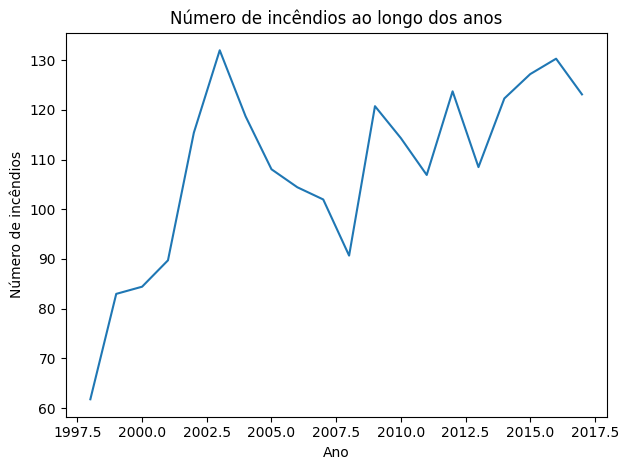

In [15]:
plt.Figure(figsize=(12, 8))
sns.lineplot(data=df, x='year', y='number', errorbar=None)
plt.title('Número de incêndios ao longo dos anos')
plt.xlabel('Ano')
plt.ylabel('Número de incêndios')
plt.tight_layout()

**03. Qual foi o mês com maior incidência de incêndios no conjunto de dados?**

**08. Existe uma sazonalidade nos incêndios? Ou seja, há meses específicos com recorrência de valores mais altos?**

In [33]:
# verificando se há uma sazonalidade de incendios por mês
incendios_mes = df.groupby('month')['number'].sum().sort_values(ascending=False)
incendios_mes = pd.DataFrame(incendios_mes).reset_index()
incendios_mes

,month,number
0,Julho,92326.113
1,Outubro,88681.579
2,Agosto,88050.435
3,Novembro,85508.054
4,Setembro,58578.305
5,Dezembro,57535.480
6,Junho,56010.675
7,Janeiro,47747.844
8,Maio,34731.363
9,Fevereiro,30848.050


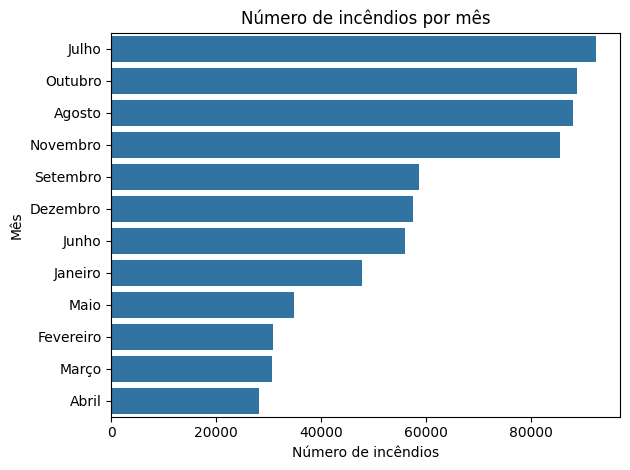

In [30]:
plt.Figure(figsize=(12, 8))
sns.barplot(data=incendios_mes, x='number', y='month')
plt.title('Número de incêndios por mês')
plt.xlabel('Número de incêndios')
plt.ylabel('Mês')
plt.tight_layout()